**Program Goal: To Find the best suitable regression algorithm for the given dataset 'CRPI-Mod.csv'**



**1) Importing the required Python Libraries and packages**

In [173]:
# Importing the Python libraries and Packages
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


**2) Read the ML Training Data file and check**

In [174]:
# Reading the Input Data File and checking
df = pd.read_csv('D:/CRPI-Latest1/Data-Files/CRPI-Mod.csv')
print(df.shape)

(1520, 5)


In [175]:
# Checking for columnwise missing data
df.isnull().sum()

Year                             0
City                             0
Population (in Lakhs) (2011)+    0
Type                             0
Crime Rate                       0
dtype: int64

**Note: There are no missing values in the given input dataset**

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1520 non-null   int64  
 1   City                           1520 non-null   object 
 2   Population (in Lakhs) (2011)+  1520 non-null   float64
 3   Type                           1520 non-null   object 
 4   Crime Rate                     1520 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 59.5+ KB


In [177]:
df.head()

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,Ahmedabad,63.5,Murder,1.291339
1,2015,Ahmedabad,63.5,Murder,1.480315
2,2016,Ahmedabad,63.5,Murder,1.622047
3,2017,Ahmedabad,63.5,Murder,1.417323
4,2018,Ahmedabad,63.5,Murder,1.543307


In [178]:
df.tail()

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
1515,2017,Surat,45.8,Cyber Crimes,2.292576
1516,2018,Surat,45.8,Cyber Crimes,3.384279
1517,2019,Surat,45.8,Cyber Crimes,4.978166
1518,2020,Surat,45.8,Cyber Crimes,4.454148
1519,2021,Surat,45.8,Cyber Crimes,6.462882


**Note: We need to preprocess and convert the data in the columns "City" and "Type" into its corresponding numerical values so that the Regression algorihms can read the data in this dataframe without any error.**

**3) Trainingt Dataset Preprocessing**

In [179]:
# Converting "City" column based data from "Object" to "Integer"
le = preprocessing.LabelEncoder()
df['City1'] = le.fit_transform(df.City.values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1520 non-null   int64  
 1   City                           1520 non-null   object 
 2   Population (in Lakhs) (2011)+  1520 non-null   float64
 3   Type                           1520 non-null   object 
 4   Crime Rate                     1520 non-null   float64
 5   City1                          1520 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 65.4+ KB


In [180]:
df1 = df.sort_values(by=["City","City1"])
Unique_City_City1 = df1[['City', 'City1']].drop_duplicates()
print(Unique_City_City1)

           City  City1
0     Ahmedabad      0
8     Bengaluru      1
16      Chennai      2
24   Coimbatore      3
32        Delhi      4
40    Ghaziabad      5
48    Hyderabad      6
56       Indore      7
64       Jaipur      8
72       Kanpur      9
80        Kochi     10
88      Kolkata     11
96    Kozhikode     12
104     Lucknow     13
112      Mumbai     14
120      Nagpur     15
128       Patna     16
136        Pune     17
144       Surat     18


In [181]:
# Converting "Type" column based data from "Object" to "Integer"
le = preprocessing.LabelEncoder()
df['Type1'] = le.fit_transform(df.Type.values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1520 non-null   int64  
 1   City                           1520 non-null   object 
 2   Population (in Lakhs) (2011)+  1520 non-null   float64
 3   Type                           1520 non-null   object 
 4   Crime Rate                     1520 non-null   float64
 5   City1                          1520 non-null   int32  
 6   Type1                          1520 non-null   int32  
dtypes: float64(2), int32(2), int64(1), object(2)
memory usage: 71.4+ KB


In [182]:
df2 = df.sort_values(by=["Type","Type1"])
Unique_Type_Type1 = df2[['Type', 'Type1']].drop_duplicates()
print(Unique_Type_Type1)

                              Type  Type1
608   Crime Committed by Juveniles      0
912               Crime against SC      1
1064              Crime against ST      2
760   Crime against Senior Citizen      3
456         Crime against children      4
304            Crime against women      5
1368                  Cyber Crimes      6
1216             Economic Offences      7
152                     Kidnapping      8
0                           Murder      9


In [183]:
df = df.drop(['City', 'Type'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1520 non-null   int64  
 1   Population (in Lakhs) (2011)+  1520 non-null   float64
 2   Crime Rate                     1520 non-null   float64
 3   City1                          1520 non-null   int32  
 4   Type1                          1520 non-null   int32  
dtypes: float64(2), int32(2), int64(1)
memory usage: 47.6 KB


In [184]:
df.head()

,Year,Population (in Lakhs) (2011)+,Crime Rate,City1,Type1
0,2014,63.5,1.291339,0,9
1,2015,63.5,1.480315,0,9
2,2016,63.5,1.622047,0,9
3,2017,63.5,1.417323,0,9
4,2018,63.5,1.543307,0,9


In [185]:
df.tail()

,Year,Population (in Lakhs) (2011)+,Crime Rate,City1,Type1
1515,2017,45.8,2.292576,18,6
1516,2018,45.8,3.384279,18,6
1517,2019,45.8,4.978166,18,6
1518,2020,45.8,4.454148,18,6
1519,2021,45.8,6.462882,18,6


**4) Data Slicing and Data preparation for applying main ML Regression algorithms**

In [186]:
X = df.drop(['Crime Rate'], axis = 1)
y = df['Crime Rate']
X.head()

,Year,Population (in Lakhs) (2011)+,City1,Type1
0,2014,63.5,0,9
1,2015,63.5,0,9
2,2016,63.5,0,9
3,2017,63.5,0,9
4,2018,63.5,0,9


In [187]:
y[:5]

0    1.291339
1    1.480315
2    1.622047
3    1.417323
4    1.543307
Name: Crime Rate, dtype: float64

In [188]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1216, 4)
(1216,)
(304, 4)
(304,)


**5) Using LinearRegression algorithm**

In [189]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [190]:
# Predicting the Test set results
y_pred = LR.predict(X_test)

In [191]:
LR_Training_Acc= LR.score(X_train,y_train)
#LR_Training_Acc= LR_Training_Accuracy.round(4)
LR_Prediction_Acc = r2_score(y_test,y_pred)
#LR_Prediction_Acc= LR_Prediction_Accuracy.round(4)

In [192]:
print("Training Accuracy :", LR_Training_Acc)
print("Prediction Accuracy :", LR_Prediction_Acc)

Training Accuracy : 0.04644968162443397
Prediction Accuracy : 0.03209744686935201


In [193]:
New_prediction1 = LR.predict(X_train)
print(New_prediction1[:5])

[ 7.97178798  8.57659566 11.63498175  8.04533405  4.83672646]


In [194]:
LR_Training_Error= np.sqrt(mean_squared_error(y_train,New_prediction1))
LR_Training_Err= LR_Training_Error.round(2)
LR_Prediction_Error = np.sqrt(mean_squared_error(y_test, y_pred))
LR_Prediction_Err= LR_Prediction_Error.round(2)

In [195]:
print("Training Error :", LR_Training_Err)
print("Prediction Error :", LR_Prediction_Err)

Training Error : 18.32
Prediction Error : 21.88


**2) Using RandomForestRegressor algorithm**

In [196]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=300, random_state=0)
RFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [197]:
# Calculate the accuracy of learning by the Algorithm
RFR.score(X_train,y_train)

0.987099331796516

In [198]:
# Predicting the Test set results
RFR_y_pred = RFR.predict(X_test)

In [199]:
RFR_Training_Acc = RFR.score(X_train,y_train)
#RFR_Training_Acc = RFR_Training_Accuracy.round(4)
RFR_Prediction_Acc = r2_score(y_test,RFR_y_pred)
#RFR_Prediction_Acc = RFR_Prediction_Accuracy.round(4)

In [200]:
print("Training Accuracy :", RFR_Training_Acc)
print("Prediction Accuracy :", RFR_Prediction_Acc)

Training Accuracy : 0.987099331796516
Prediction Accuracy : 0.8565621000551238


In [201]:
RFR_Train_Prediction = RFR.predict(X_train)
print(RFR_Train_Prediction[:5])

[1.58974525e-01 3.08932568e+00 7.47826252e+00 3.85337131e-04
 6.56822252e-01]


In [202]:
RFR_Training_Error = np.sqrt(mean_squared_error(y_train,RFR_Train_Prediction))
RFR_Training_Err = RFR_Training_Error.round(2)
RFR_Prediction_Error = np.sqrt(mean_squared_error(y_test, RFR_y_pred))
RFR_Prediction_Err = RFR_Prediction_Error.round(2)

In [203]:
print("Training Error :", RFR_Training_Err)
print("Prediction Error :", RFR_Prediction_Err)

Training Error : 2.13
Prediction Error : 8.42


**3) Using DecisionTreeRegressor algorithm**

In [204]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only random_state=0 or 42.
DTR = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [205]:
DTR_y_pred = DTR.predict(X_test)

In [206]:
DTR_Training_Acc = DTR.score(X_train,y_train)
#DTR_Training_Acc=DTR_Training_Accuracy.round(4)
DTR_Prediction_Acc = r2_score(y_test,DTR_y_pred)
#DTR_Prediction_Acc=DTR_Prediction_Accuracy.round(4)

In [207]:
print("Training Accuracy :", DTR_Training_Acc)
print("Prediction Accuracy :", DTR_Prediction_Acc)

Training Accuracy : 1.0
Prediction Accuracy : 0.8413080107368589


In [208]:
DTR_Train_Prediction = DTR.predict(X_train)
print(DTR_Train_Prediction[:5])

[0.15748031 3.47161572 6.74876847 0.         0.84745763]


In [209]:
DTR_Training_Error = np.sqrt(mean_squared_error(y_train,DTR_Train_Prediction))
DTR_Training_Err=DTR_Training_Error.round(2)
DTR_Prediction_Error = np.sqrt(mean_squared_error(y_test, DTR_y_pred))
DTR_Prediction_Err=DTR_Prediction_Error.round(2)

In [210]:
print("Training Error :", DTR_Training_Err)
print("Prediction Error :", DTR_Prediction_Err)

Training Error : 0.0
Prediction Error : 8.86


**4) Using SupportVectorRegressor (SVR) algorithm**

In [211]:
from sklearn.svm import SVR
SVR = SVR()
#SVR_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
SVR.fit(X_train, y_train)

SVR()

In [212]:
SVR_y_pred = SVR.predict(X_test)

In [213]:
SVR_Training_Acc = SVR.score(X_train,y_train)
#SVR_Training_Acc=SVR_Training_Accuracy.round(4)
SVR_Prediction_Acc = r2_score(y_test,SVR_y_pred)
#SVR_Prediction_Acc=SVR_Prediction_Accuracy.round(4)

In [214]:
print("Training Accuracy :", SVR_Training_Acc)
print("Prediction Accuracy :", SVR_Prediction_Acc)

Training Accuracy : -0.15007561256647328
Prediction Accuracy : -0.1820662837720508


In [215]:
SVR_Train_Prediction = SVR.predict(X_train)
print(SVR_Train_Prediction[:5])

[3.86324571 3.87616193 3.88420196 3.87881417 3.8784429 ]


In [216]:
SVR_Training_Error = np.sqrt(mean_squared_error(y_train, SVR_Train_Prediction))
SVR_Training_Err=SVR_Training_Error.round(2)
SVR_Prediction_Error = np.sqrt(mean_squared_error(y_test, SVR_y_pred))
SVR_Prediction_Err=SVR_Prediction_Error.round(2)

In [217]:
print("Training Error :", SVR_Training_Err)
print("Prediction Error :", SVR_Prediction_Err)

Training Error : 20.12
Prediction Error : 24.18


**5) Using K-Nearest Neighbors Regressor (KNeighborsRegressor) algorithm**

In [218]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [219]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    KNN_Regressor = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN_Regressor.fit(X_train, y_train)  #fit the model
    KNN_pred=KNN_Regressor.predict(X_test) #make prediction on test set
    KNN_error = sqrt(mean_squared_error(y_test,KNN_pred)) #calculate rmse
    rmse_val.append(KNN_error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', KNN_error)

RMSE value for k=  1 is: 19.780805871864285
RMSE value for k=  2 is: 16.297468487458122
RMSE value for k=  3 is: 14.517035504514443
RMSE value for k=  4 is: 15.344521198480649
RMSE value for k=  5 is: 16.312644708370744
RMSE value for k=  6 is: 16.12547810284652
RMSE value for k=  7 is: 16.204424770732185
RMSE value for k=  8 is: 16.17396024705777
RMSE value for k=  9 is: 15.890331288289648
RMSE value for k=  10 is: 15.913866368954011
RMSE value for k=  11 is: 16.24422054097482
RMSE value for k=  12 is: 16.672193903246864
RMSE value for k=  13 is: 16.829468075692592
RMSE value for k=  14 is: 17.08057337265841
RMSE value for k=  15 is: 17.184387488233583
RMSE value for k=  16 is: 17.25377219260606
RMSE value for k=  17 is: 17.554703051628792
RMSE value for k=  18 is: 17.74197945392631
RMSE value for k=  19 is: 17.847873215596753
RMSE value for k=  20 is: 18.04245474033636


<Axes: >

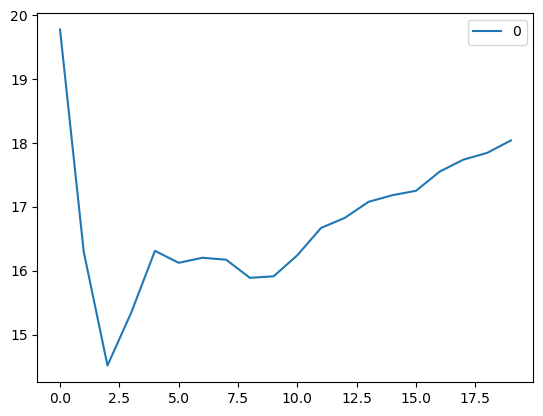

In [220]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [221]:
from sklearn.neighbors import KNeighborsRegressor
KNNR = KNeighborsRegressor(n_neighbors=5)
KNNR.fit(X_train, y_train)

KNeighborsRegressor()

In [222]:
KNN1_y_pred=KNNR.predict(X_test)

In [223]:
KNN1_Training_Acc = KNNR.score(X_train,y_train)
#KNN1_Training_Acc = KNN1_Training_Accuracy.round(4)
KNN1_Prediction_Acc = r2_score(y_test,KNN1_y_pred)
#KNN1_Prediction_Acc = KNN1_Prediction_Accuracy.round(4)

In [224]:
print("Training Accuracy :", KNN1_Training_Acc)
print("Prediction Accuracy :", KNN1_Prediction_Acc)

Training Accuracy : 0.5847273110605632
Prediction Accuracy : 0.4618727418373827


In [225]:
KNN1_Train_Prediction = KNNR.predict(X_train)
print(KNN1_Train_Prediction[:5])

[3.09606299 1.75545852 9.90147783 0.93835616 1.11864407]


In [226]:
KNN1_Training_Error = np.sqrt(mean_squared_error(y_train, KNN1_Train_Prediction))
KNN1_Training_Err = KNN1_Training_Error.round(2)
KNN1_Prediction_Error = np.sqrt(mean_squared_error(y_test, KNN1_y_pred))
KNN1_Prediction_Err = KNN1_Prediction_Error.round(2)

In [227]:
print("Training Error :", KNN1_Training_Err)
print("Prediction Error :", KNN1_Prediction_Err)

Training Error : 12.09
Prediction Error : 16.31


In [228]:
df1 = pd.DataFrame({
    'ML Regressor Algorithm': ['Linear_Regression','Random_Forest_Regressor','Decision_Trees_Regressor','Support_Vector_Regressor', 'KNN_Regressor'],
    'Train_acc': [LR_Training_Acc, RFR_Training_Acc, DTR_Training_Acc, SVR_Training_Acc, KNN1_Training_Acc],
    'Prediction_acc': [LR_Prediction_Acc, RFR_Prediction_Acc, DTR_Training_Acc, SVR_Prediction_Acc, KNN1_Prediction_Acc],
    'Train_Err': [LR_Training_Err, RFR_Training_Err, DTR_Training_Err, SVR_Training_Err, KNN1_Training_Err],
    'Prediction_Err': [LR_Prediction_Err, RFR_Prediction_Err, DTR_Prediction_Err, SVR_Prediction_Err, KNN1_Prediction_Err],
    'Suitability': ['Not Suitable', 'Not Suitable', 'Suitable', 'Not Suitable', 'Not Suitable']})

df1

,ML Regressor Algorithm,Train_acc,Prediction_acc,Train_Err,Prediction_Err,Suitability
0,Linear_Regression,0.046450,0.032097,18.32,21.88,Not Suitable
1,Random_Forest_Regressor,0.987099,0.856562,2.13,8.42,Not Suitable
2,Decision_Trees_Regressor,1.000000,1.000000,0.00,8.86,Suitable
3,Support_Vector_Regressor,-0.150076,-0.182066,20.12,24.18,Not Suitable
4,KNN_Regressor,0.584727,0.461873,12.09,16.31,Not Suitable


**Note: Here, we find that "Decision Tree Regressor" is the most suitable algorithm for the given dataset as it gives the highest Training and Prediction accuracies (1.0000 ---> 100%)**